## THIAW Mouhamadou Lamine Bara

### Modèles Stochastiques en Finance MAP 552
### Ecole Polytechnique
### Département de Mathématiques Appliquées


# Computer Problem Set 3.1
# Monte Carlo approximation of the Greeks

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps


## 1. Monte Carlo approximation of $C_0$

#### (a) Build a program which returns $C_0$ and $\Delta_0$ for given values of $r$, $\sigma$, $S_0$, $T$, $K$. 

In [74]:
def d_moins(x,v):
    return np.log(x)/np.sqrt(v) -0.5 * np.sqrt(v)

N = lambda x: sps.norm.cdf(x)
N_prime = lambda x: sps.norm.pdf(x)


def C_0(r, sigma, S0, T, K):
    X0= S0 / (K*np.exp(-r*T))
    return np.exp(-r*T)*N(-d_moins(X0,T*sigma**2))


def Delta0(r, sigma, S0, T, K):
    X0= S0 / (K*np.exp(-r*T))

    return  (-np.exp(-r*T)/ (S0*np.sqrt(T*sigma**2)))   *   N_prime(-d_moins(X0,T*sigma**2))


#### (b) Build a program which returns a Monte Carlo approximation $C^M_0$ of $C_0$ based on $M$ copies of $B_T$. 

In [75]:
def C_0_MC(r, sigma, S0, T, K, M):
    B_T = np.sqrt(T)*np.random.normal(0, 1, size=(M) if np.isscalar(K) else (M, K.size))
    ST = S0*np.exp((r - 0.5*sigma**2)*T + sigma*B_T)
    return np.exp(-r*T)*(ST <= K).mean(axis=0)


(c) Numérical results discussion

In [76]:
r = 0.02
sigma0 = 0.4
S0 = 100
T = 0.9
K = np.array(range(80, 80+40+1))

Text(0.5, 0, '$K$')

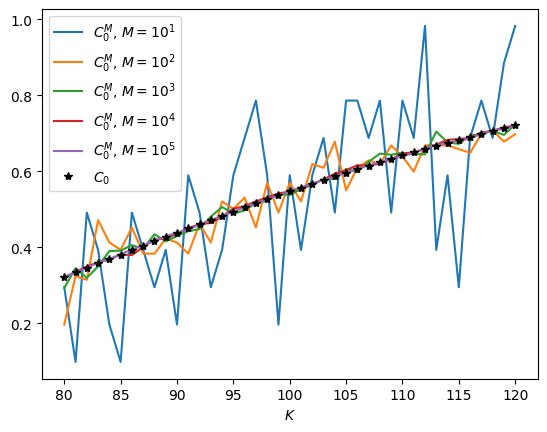

In [77]:
plt.figure()
legendes = []
for M in 10**np.arange(1, 6):
    C0_MC = C_0_MC(r, sigma0, S0, T, K[None, :], M)
    plt.plot(K, C0_MC)
    legendes.append("$C^M_0$, "+f"$M=10^{np.log10(M):.0f}$")

C0 = C_0(r, sigma0, S0, T, K)
plt.plot(K, C0, '*', color='black')
legendes.append('$C_0$')
plt.legend(legendes)
plt.xlabel("$K$")

In [78]:
C_0_MC(r, sigma0, S0, T, K, M)

array([0.32362206, 0.33268741, 0.34444387, 0.35785037, 0.37047114,
       0.38063651, 0.38974114, 0.40446373, 0.41431481, 0.4253543 ,
       0.44038136, 0.44855294, 0.46104603, 0.4733918 , 0.48055175,
       0.4925734 , 0.50150124, 0.51521221, 0.52565258, 0.53424649,
       0.54684762, 0.55537278, 0.56581315, 0.57665621, 0.58907072,
       0.59468868, 0.60437279, 0.61280955, 0.62267045, 0.62874021,
       0.6433253 , 0.65078972, 0.65917738, 0.66777129, 0.67371336,
       0.6834564 , 0.69361194, 0.69764862, 0.70724434, 0.71452215,
       0.71977671])

We can see that when the samples sizes increase, the fluctuations on the values of $C_0^M$ are less important and they in fact converge to $C_0$

In [79]:
def C_0_MC(r, sigma, S0, T, K, M):
    B_T = np.sqrt(T)*np.random.normal(0, 1, size=(M) if np.isscalar(K) else (M, K.size))
    ST = S0*np.exp((r - 0.5*sigma**2)*T + sigma*B_T)
    return np.exp(-r*T)*(ST <= K).mean(axis=0)


(2)

2.1 
 a program which returns the centered finite-differences appproximation  of $\Delta_0$ and the corresponding 5% confidence interval

$$\nonumber
\Delta_0^{M, \varepsilon} = \dfrac{C^M_0(S_0 + \varepsilon) - C^M_0(S_0 - \varepsilon)}{2 \varepsilon}
$$

In [80]:
def Delta_0_MC(r, sigma, S0, T, K, M,epsilon):
    B_T = np.sqrt(T)*np.random.normal(0, 1, size=(M) if np.isscalar(K) else (M, K.size))
    STplus = (S0 + epsilon)*np.exp((r - 0.5*sigma**2)*T + sigma*B_T)
    STmoins = (S0 - epsilon)*np.exp((r - 0.5*sigma**2)*T + sigma*B_T)
    Delta = np.exp(-r*T) * ((STplus <= K).mean(axis=0) - (STmoins <= K).mean(axis=0)) / (2*epsilon)
    
    Std_dev = np.sqrt((np.exp(-r*T) * (np.logical_xor(STplus <= K, STmoins <= K)) / (2*epsilon)).var(axis=0) / M)

    IC_low, IC_high = Delta + Std_dev * sps.norm.ppf(0.05*.5), Delta + Std_dev * sps.norm.ppf(1 - 0.05*.5)
    return Delta,IC_low,IC_high



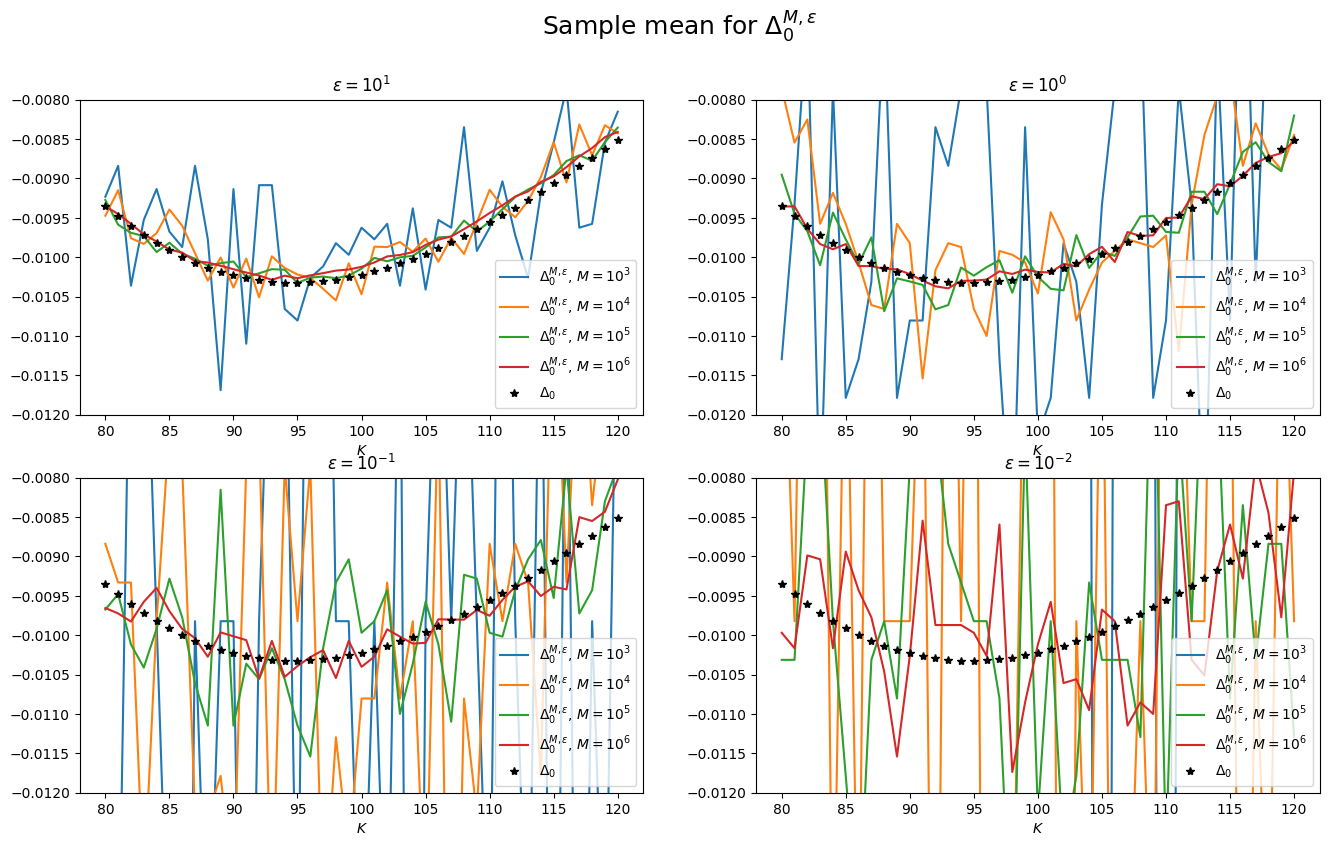

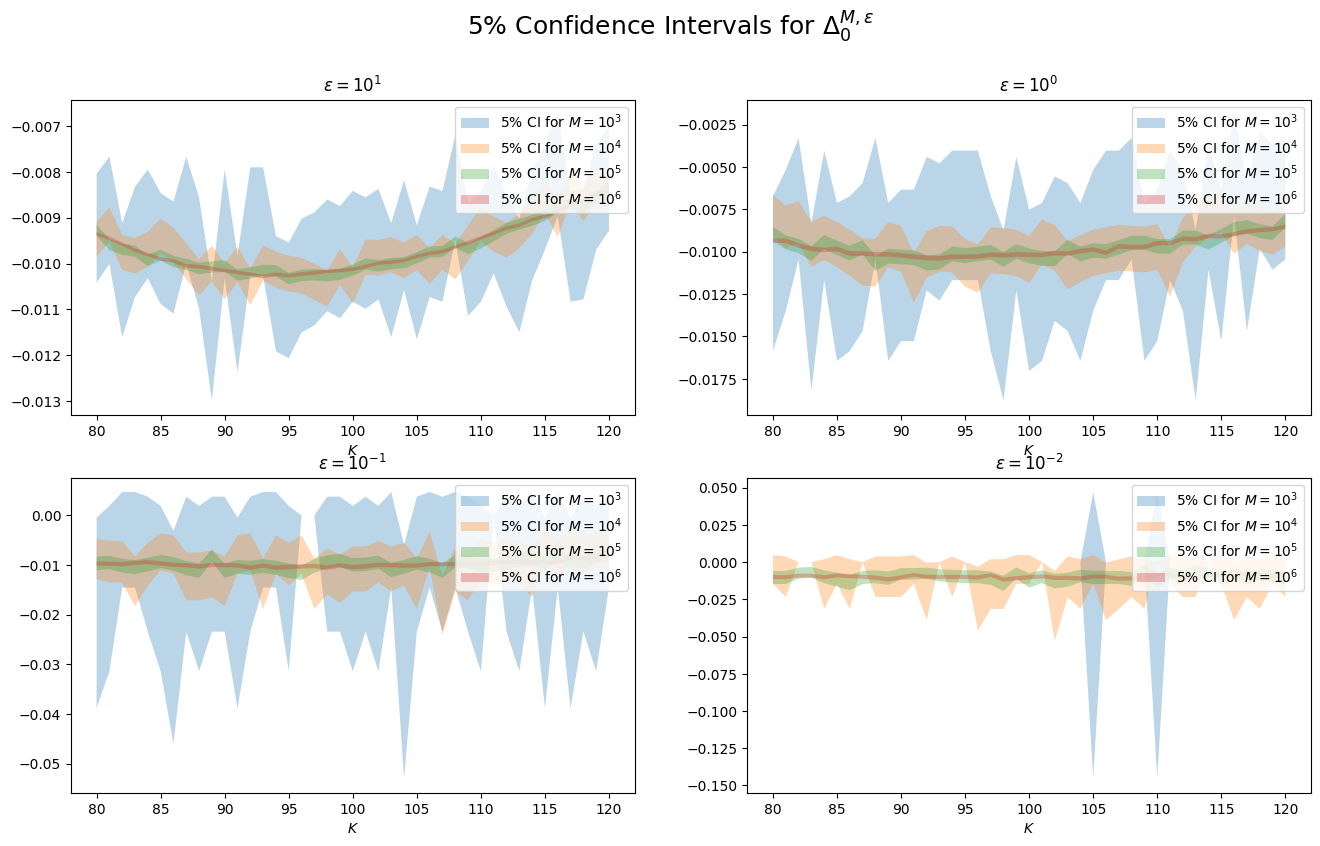

In [81]:
r = 0.02
sigma_ = 0.4
S0 = 100
T = 0.9
K = np.arange(80, 80+40+1)

# Sample means

plt.figure(figsize=(16,9))
plt.suptitle("Sample mean for $\Delta^{M,\\varepsilon}_0$", fontsize=18)

IC_lows, IC_highs = [], []

mags = 10.**np.arange(-1, -5, -1)

for i, eps_ in enumerate(S0*mags):
    plt.subplot(221+i)
    plt.title(f"$\\varepsilon = 10^{{{np.log10(eps_):.0f}}}$")
    lines, legends = [], []
    for M in 100*mags**(-1):
        Delta0_M_eps_, IC_lo, IC_hi = Delta_0_MC(r, sigma_, S0, T, K[None, :], int(M), eps_)
        IC_lows.append(IC_lo); IC_highs.append(IC_hi)
        line, = plt.plot(K, Delta0_M_eps_)
        lines.append(line)
        legends.append("$\Delta^{M,\\varepsilon}_0$, "+f"$M=10^{np.log10(M):.0f}$")
        
    delta0 = Delta0(r, sigma_, S0, T, K)
    line, = plt.plot(K, delta0, '*', color='black')
    lines.append(line)
    legends.append("$\Delta_0$")
    
    plt.legend(lines, legends)
    plt.xlabel("$K$")
    plt.ylim([-0.012, -0.008])

plt.show()

# Confidence intervals

plt.figure(figsize=(16,9))
plt.suptitle("5% Confidence Intervals for $\Delta^{M,\\varepsilon}_0$", fontsize=18)

IC_lows.reverse(), IC_highs.reverse()

for i, eps_ in enumerate(S0*mags):
    plt.subplot(221+i)
    plt.title(f"$\\varepsilon = 10^{{{np.log10(eps_):.0f}}}$")
    lines, legends = [], []
    for M in 100*mags**(-1):
        line = plt.fill_between(K, IC_lows.pop(), IC_highs.pop(), alpha=0.3)
        lines.append(line)
        legends.append("5% CI for "+f"$M=10^{np.log10(M):.0f}$")
    
    plt.legend(lines, legends)
    plt.xlabel("$K$")

plt.show()

## The Monte Carlo method have very high variance and when $\epsilon$ decrease, it become worst

3.

#### (a) Build a program which returns a Monte Carlo approximation $\hat{\Delta}^M_0$ of $\Delta_0$ based on the last representation. 

In [82]:
def Delta0_M_hat(r,sigma,S0,T,K,M):
    B_T = np.sqrt(T)*np.random.normal(0, 1, size=(M) if np.isscalar(K) else (M, K.size))
    ST = S0*np.exp((r - 0.5*sigma**2)*T + sigma*B_T)
    res= np.exp(-r*T)*  ((ST <= K)* B_T/(S0*sigma*T)).mean(axis=0)
    return res


(b) Comparing performances

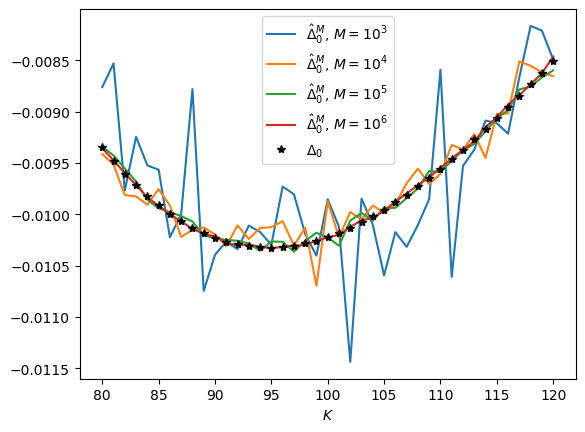

In [83]:
r = 0.02; sigma = 0.4; S0 = 100; T = 0.9; K = np.arange(80, 80+40+1)

plt.figure()
legends = []
for M in 10**np.arange(3, 7):
    delta = Delta0_M_hat(r, sigma, S0, T, K[None, :], M)
    plt.plot(K, delta)
    legends.append("$\hat{\Delta}^M_0$, "+f"$M=10^{np.log10(M):.0f}$")

delta0 = Delta0(r, sigma, S0, T, K)
plt.plot(K, delta0, '*', color='black')
legends.append("$\Delta_0$")
plt.legend(legends)
plt.xlabel("$K$")

plt.show()    

Using the Monte Carlo estimator $\hat\Delta_0^N$ of this representation of $\Delta_0$ for the same sample size  yields much better results than the naive finite-differences method.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------